In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import keras
from keras.optimizers import Adam
print("[INFO]: Tensorflow version{}".format(tf.__version__))
state_gpu = tf.test.gpu_device_name()
print("[INFO]: GPU usage{0}".format(state_gpu))

[INFO]: Tensorflow version2.12.0
[INFO]: GPU usage/device:GPU:0


In [4]:
ROT_RANGE = 10

# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
rescale = 1./255,
rotation_range = ROT_RANGE,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

valid_gen = ImageDataGenerator(rescale = 1./255)


In [5]:
TRAINING_DIR = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/train' 
VALIDATION_DIR = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/valid/'
TEST_DIR = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/test/'

In [6]:
TARGET_SIZE = (224,224)
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)


TEST_BATCH_SIZE = 1
test_data = valid_gen.flow_from_directory(
TEST_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TEST_BATCH_SIZE,
shuffle=False
)

Found 12795 images belonging to 10 classes.
Found 3667 images belonging to 10 classes.
Found 1841 images belonging to 10 classes.


In [7]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
image_size = [224, 224]
base_model= ResNet152V2(input_shape=image_size + [3], weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False
x = Flatten()(base_model.output)
prediction = Dense(10, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = prediction)
# x = keras.layers.Flatten() (base_model.output)
# x = keras.layers.Dense(256, activation="relu")(x)
# x = keras.layers.Dropout(0.25)(x)
# output = keras.layers.Dense(16, activation='softmax')(x)
# model = keras.models.Model(inputs=base_model.input, outputs=output)

# # The newly added layers are initialized with random values.
# # Make sure based model remain unchanged until newly added layers weights get reasonable values.
# for layer in base_model.layers:
#     layer.trainable = False
    

234545216/234545216 [==============================] - 2s 0us/step


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
LEARNING_RATE = 0.0001
#LEARNING_RATE = 0.001

#Optimizer
opt = Adam(lr = LEARNING_RATE)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
TRAINING_NUM = train_data.n 
VALID_NUM = valid_data.n
EPOCHS = 10

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

history = model.fit(train_data,
                              validation_data = valid_data,
                              epochs = EPOCHS,
                              steps_per_epoch = STEP_SIZE_TRAIN,
                              validation_steps = STEP_SIZE_VALID                          
                
                             )

Epoch 1/10
99/99 [==============================] - 4207s 42s/step - loss: 1.3298 - accuracy: 0.6168 - val_loss: 0.7519 - val_accuracy: 0.7667
Epoch 2/10
99/99 [==============================] - 241s 2s/step - loss: 0.6384 - accuracy: 0.7958 - val_loss: 0.5443 - val_accuracy: 0.8273
Epoch 3/10
99/99 [==============================] - 228s 2s/step - loss: 0.5136 - accuracy: 0.8307 - val_loss: 0.4516 - val_accuracy: 0.8558
Epoch 4/10
99/99 [==============================] - 249s 3s/step - loss: 0.4418 - accuracy: 0.8543 - val_loss: 0.4308 - val_accuracy: 0.8561
Epoch 5/10
99/99 [==============================] - 240s 2s/step - loss: 0.3825 - accuracy: 0.8738 - val_loss: 0.3786 - val_accuracy: 0.8775
Epoch 6/10
99/99 [==============================] - 239s 2s/step - loss: 0.3601 - accuracy: 0.8795 - val_loss: 0.3472 - val_accuracy: 0.8904
Epoch 7/10
99/99 [==============================] - 244s 2s/step - loss: 0.3427 - accuracy: 0.8879 - val_loss: 0.3320 - val_accuracy: 0.8961
Epoch 8/10


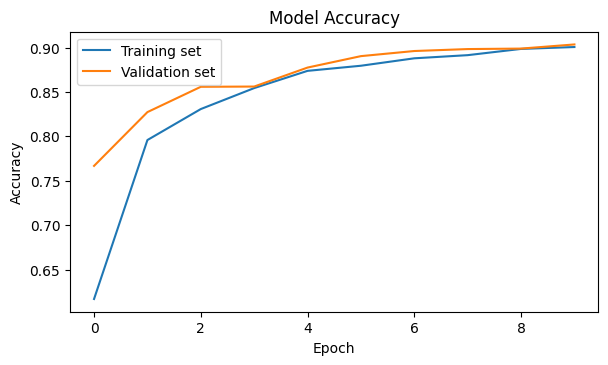

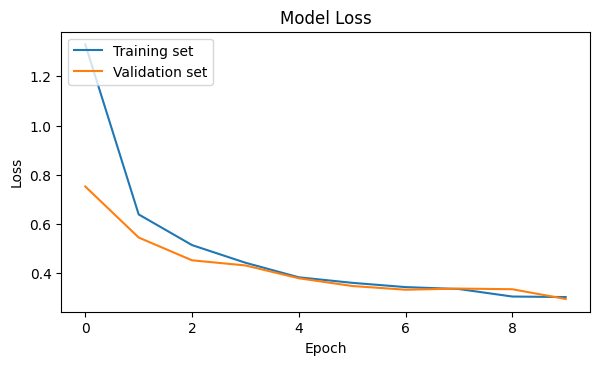

In [11]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [12]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 90.35087823867798


In [13]:
for layer in base_model.layers:
    layer.trainable = True

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate (This ensures the base model weights do not change a lot)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
TARGET_SIZE = (224,224)
TRAIN_BATCH_SIZE = 64
VALID_BATCH_SIZE = 32
SEED = 42

#Data Iterator
train_data = train_gen.flow_from_directory(
TRAINING_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TRAIN_BATCH_SIZE,
shuffle = True,
seed = SEED
)

valid_data = valid_gen.flow_from_directory(
VALIDATION_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = VALID_BATCH_SIZE
)


TEST_BATCH_SIZE = 1
test_data = valid_gen.flow_from_directory(
TEST_DIR,
target_size = TARGET_SIZE,
class_mode = 'categorical',
color_mode = "rgb",
batch_size = TEST_BATCH_SIZE,
shuffle=False
)

Found 12795 images belonging to 10 classes.
Found 3667 images belonging to 10 classes.
Found 1841 images belonging to 10 classes.


In [15]:
TRAINING_NUM = train_data.n #or train_data.samples
VALID_NUM = valid_data.n
EPOCHS = 10

STEP_SIZE_TRAIN = TRAINING_NUM // TRAIN_BATCH_SIZE 
STEP_SIZE_VALID = VALID_NUM // VALID_BATCH_SIZE

# Fit model to get reasonable weights for newly added layers.
history = model.fit(train_data,
                             steps_per_epoch = STEP_SIZE_TRAIN,
                             validation_data = valid_data,
                             validation_steps = STEP_SIZE_VALID,
                             epochs = EPOCHS)

Epoch 1/10
199/199 [==============================] - 346s 2s/step - loss: 0.5690 - accuracy: 0.8269 - val_loss: 0.4468 - val_accuracy: 0.8599
Epoch 2/10
199/199 [==============================] - 322s 2s/step - loss: 0.2861 - accuracy: 0.9034 - val_loss: 0.2913 - val_accuracy: 0.9068
Epoch 3/10
199/199 [==============================] - 326s 2s/step - loss: 0.2093 - accuracy: 0.9292 - val_loss: 0.1976 - val_accuracy: 0.9359
Epoch 4/10
199/199 [==============================] - 340s 2s/step - loss: 0.1647 - accuracy: 0.9445 - val_loss: 0.2011 - val_accuracy: 0.9331
Epoch 5/10
199/199 [==============================] - 325s 2s/step - loss: 0.1346 - accuracy: 0.9530 - val_loss: 0.1602 - val_accuracy: 0.9449
Epoch 6/10
199/199 [==============================] - 320s 2s/step - loss: 0.1182 - accuracy: 0.9608 - val_loss: 0.1528 - val_accuracy: 0.9487
Epoch 7/10
199/199 [==============================] - 335s 2s/step - loss: 0.1035 - accuracy: 0.9646 - val_loss: 0.1497 - val_accuracy: 0.9498

In [16]:
model.save("model.h5")

In [17]:
best_val_acc = max(history.history['val_accuracy'])
print("[INFO] Best Validation Accuracy: %",best_val_acc*100)

[INFO] Best Validation Accuracy: % 96.71052694320679


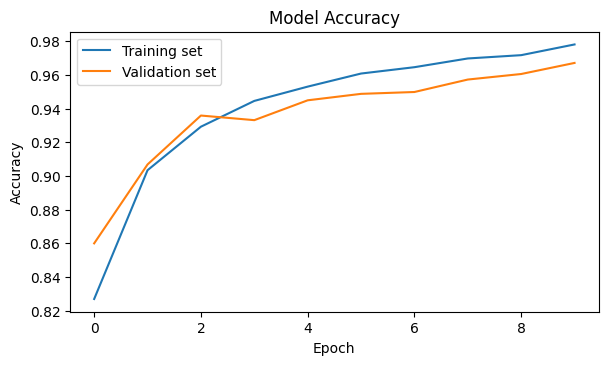

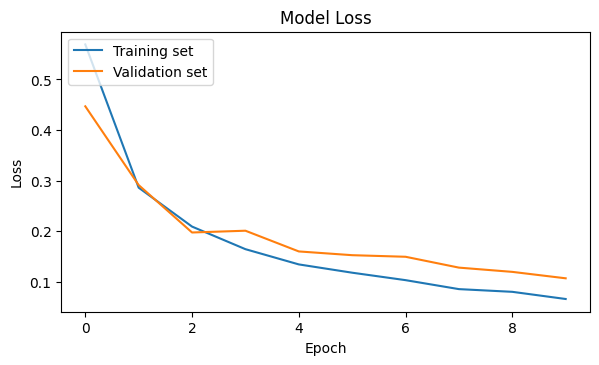

In [18]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15,8)) 
    
plt.subplot(221)  
# Accuracy 
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8)) 
plt.subplot(222)  
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [19]:
# Evaluation on test dataset
test_loss, test_score = model.evaluate(test_data)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

1841/1841 [==============================] - 595s 323ms/step - loss: 0.0791 - accuracy: 0.9690
Loss on test set:  0.0791219025850296
Accuracy on test set:  0.9690385460853577


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
# Get predictions
preds = model.predict(test_data)
preds = np.argmax(preds, axis=-1)

# Original labels
#orig_test_labels = np.argmax(test_labels, axis=-1)

#print(orig_test_labels.shape)
print(preds)
print(test_data.classes)
accuracy = accuracy_score(test_data.classes, preds)
print("Test Accuracy:", accuracy)

1841/1841 [==============================] - 41s 20ms/step
[0 0 0 ... 9 9 9]
[0 0 0 ... 9 9 9]
Test Accuracy: 0.9690385659967409


#Confusion Matrix and Classification Report

In [21]:
import os
data_dir = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/train'

Y_pred = model.predict_generator(test_data, test_data.samples // test_data.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = sorted(os.listdir(data_dir))
print(classification_report(test_data.classes, y_pred, target_names=target_names))


#Evaluating using Keras model_evaluate:
x, y = zip(*(test_data[i] for i in range(len(test_data))))
x_test, y_test = np.vstack(x), np.vstack(y)
loss, acc = model.evaluate(x_test, y_test)

print("Accuracy: " ,acc)
print("Loss: ", loss)

<ipython-input-21-b919b7781b97>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_data, test_data.samples // test_data.batch_size)


Classification Report
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.98      0.98      0.98       171
                        Tomato___Early_blight       0.97      0.93      0.95       192
                         Tomato___Late_blight       0.96      0.98      0.97       186
                           Tomato___Leaf_Mold       0.99      0.96      0.98       189
                  Tomato___Septoria_leaf_spot       0.97      0.99      0.98       175
Tomato___Spider_mites Two-spotted_spider_mite       0.98      0.93      0.95       175
                         Tomato___Target_Spot       0.89      0.95      0.92       184
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.98      0.99       197
                 Tomato___Tomato_mosaic_virus       0.99      1.00      1.00       179
                             Tomato___healthy       0.96      0.99      0.97       193

                   

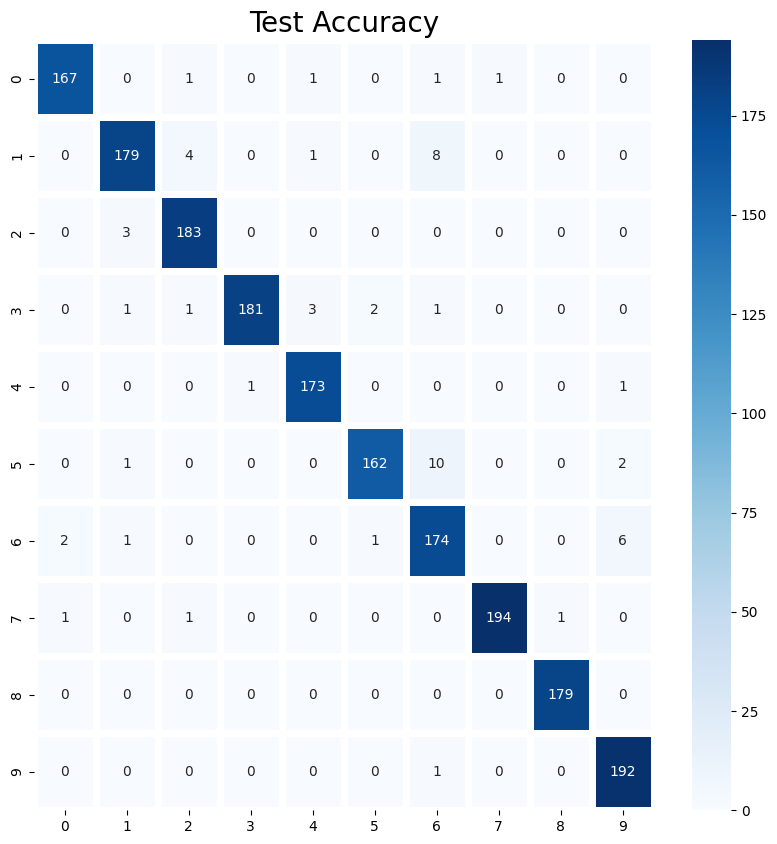

In [28]:
import seaborn as sn
confusion_mtx = confusion_matrix(test_data.classes, preds)

#ax = plt.axes()
fig, ax = plt.subplots(figsize=(10,10)) 

sn.heatmap(confusion_mtx, linewidth=5, annot=True,annot_kws={"size": 10}, cmap="Blues", ax = ax, fmt='d')
ax.set_title('Test Accuracy', size=20)
plt.show()

In [23]:
model_load = keras.models.load_model('/content/model.h5')

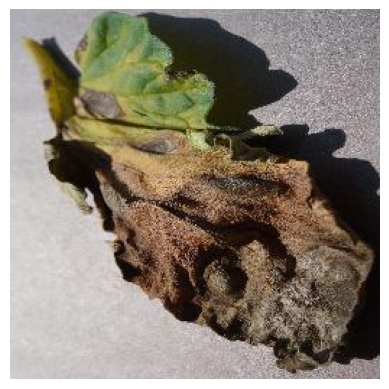

1/1 [==============================] - 2s 2s/step
Class 0: Tomato___Bacterial_spot - 0.00%
Class 1: Tomato___Early_blight - 99.80%
Class 2: Tomato___Late_blight - 0.20%
Class 3: Tomato___Leaf_Mold - 0.00%
Class 4: Tomato___Septoria_leaf_spot - 0.00%
Class 5: Tomato___Spider_mites Two-spotted_spider_mite - 0.00%
Class 6: Tomato___Target_Spot - 0.00%
Class 7: Tomato___Tomato_Yellow_Leaf_Curl_Virus - 0.00%
Class 8: Tomato___Tomato_mosaic_virus - 0.00%
Class 9: Tomato___healthy - 0.00%
Predicted class: Tomato___Early_blight


In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh cần dự đoán
image_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/test/Tomato___Early_blight/0621aab4-b9fd-4012-b0a6-ba72e63cd87d___RS_Erly.B 8220_180deg.JPG"

image = Image.open(image_path)
# Hiển thị ảnh
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path)
image = image.resize((224, 224))  
image = np.array(image) / 255.0 
image = np.expand_dims(image, axis=0) 

predictions = model.predict(image)
num_classes = predictions.shape[1]

percentages = predictions[0] / np.sum(predictions[0]) * 100

class_names = sorted(os.listdir(data_dir))

for class_idx, percentage in enumerate(percentages):
    class_name = class_names[class_idx]
    print("Class {}: {} - {:.2f}%".format(class_idx, class_name, percentage))


predicted_class = np.argmax(predictions)
confidence = np.max(predictions)

predicted_class_name = class_names[predicted_class]
confidence = np.max(predictions)

# Tính phần trăm dự đoán
total_predictions = np.sum(predictions)
percentage = confidence / total_predictions * 100

print("Predicted class:", predicted_class_name)

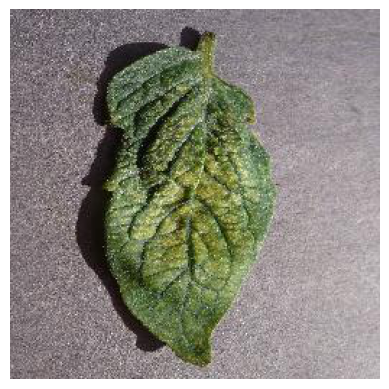

1/1 [==============================] - 0s 33ms/step
Class 0: Tomato___Bacterial_spot - 0.00%
Class 1: Tomato___Early_blight - 0.00%
Class 2: Tomato___Late_blight - 0.00%
Class 3: Tomato___Leaf_Mold - 0.00%
Class 4: Tomato___Septoria_leaf_spot - 0.00%
Class 5: Tomato___Spider_mites Two-spotted_spider_mite - 100.00%
Class 6: Tomato___Target_Spot - 0.00%
Class 7: Tomato___Tomato_Yellow_Leaf_Curl_Virus - 0.00%
Class 8: Tomato___Tomato_mosaic_virus - 0.00%
Class 9: Tomato___healthy - 0.00%
Predicted class: Tomato___Spider_mites Two-spotted_spider_mite


In [27]:
# Đường dẫn tới ảnh cần dự đoán
image_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/dataset/test/Tomato___Spider_mites Two-spotted_spider_mite/0d5846df-f761-4d38-b10f-7bdb42b989b7___Com.G_SpM_FL 1484_flipTB.JPG"
image = Image.open(image_path)
# Hiển thị ảnh
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path)
image = image.resize((224, 224))  
image = np.array(image) / 255.0 
image = np.expand_dims(image, axis=0) 

predictions = model_load.predict(image)
num_classes = predictions.shape[1]

percentages = predictions[0] / np.sum(predictions[0]) * 100

class_names = sorted(os.listdir(data_dir))

for class_idx, percentage in enumerate(percentages):
    class_name = class_names[class_idx]
    print("Class {}: {} - {:.2f}%".format(class_idx, class_name, percentage))

predicted_class = np.argmax(predictions)
confidence = np.max(predictions)

predicted_class_name = class_names[predicted_class]
confidence = np.max(predictions)

# Tính phần trăm dự đoán
total_predictions = np.sum(predictions)
percentage = confidence / total_predictions * 100

print("Predicted class:", predicted_class_name)